In [44]:
#Import Modules
import os
import deconvolution_tools.deconvolution_tools as dt
import numpy as np
import pandas as pd
import time as t
import sys
import define_ensembles as de
import h5py
import matplotlib.pyplot as plt
import networkx as nx
import EnsembleCorrelationFunctions as ecf
import matplotlib.pyplot as plt

import ophys_to_core_ensembles as es

reload(ecf)


%matplotlib inline

In [2]:
#Set Drive Path
drive_path = '/Volumes/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache/'


In [3]:
#Get BrainObservatoryCache
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
manifest_file = os.path.join(drive_path,'brain_observatory_manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

In [29]:
boc.get_all_cre_lines()


[u'Cux2-CreERT2',
 u'Emx1-IRES-Cre',
 u'Nr5a1-Cre',
 u'Rbp4-Cre_KL100',
 u'Rorb-IRES2-Cre',
 u'Scnn1a-Tg3-Cre']

In [31]:
exp_df = pd.DataFrame(boc.get_ophys_experiments(targeted_structures=['VISrl'],cre_lines=['Emx1-IRES-Cre']))
exp_df[exp_df.session_type == 'three_session_B']['id'].tolist()


[574685634, 579966129, 577313742, 573864650, 578220711, 580878455]

In [34]:
exp_df = pd.DataFrame(boc.get_ophys_experiments(targeted_structures=['VISp'],cre_lines=['Emx1-IRES-Cre']))
exp_df[exp_df.session_type == 'three_session_B']['id'].tolist()


[541048140, 540729056, 545578997, 561994407, 544507627, 526928092, 528574532]

118 Neurons in Experiment


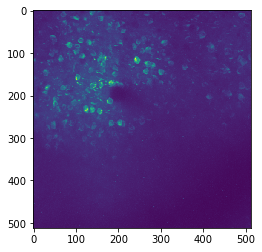

Spikes determined – 12.3468899727 elapsed


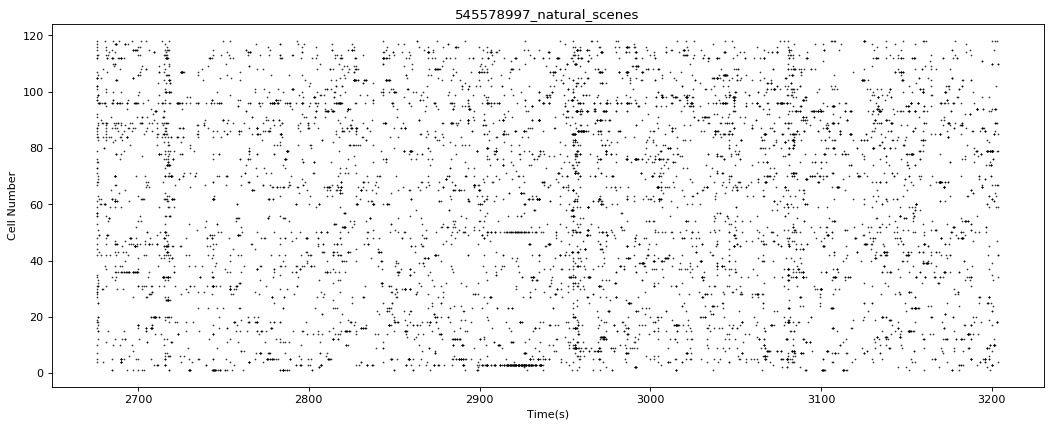

T shape
(2,)
high frequency frames determined – 67.9482898712 elapsed
Number of high frequency frames: 105
verbose = True


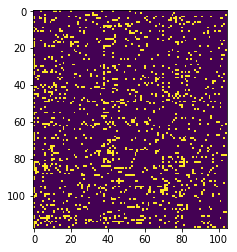

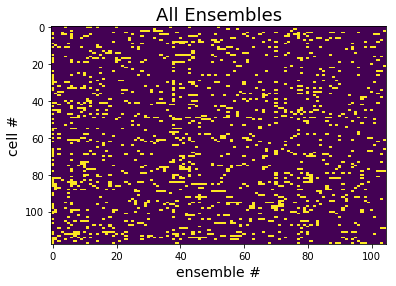

('Total number of permutations ', (5460,))
('zip permutations example of first 300: ', [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (51, 0), (52, 0), (53, 0), (54, 0), (55, 0), (56, 0), (57, 0), (58, 0), (59, 0), (60, 0), (61, 0), (62, 0), (63, 0), (64, 0), (65, 0), (66, 0), (67, 0), (68, 0), (69, 0), (70, 0), (71, 0), (72, 0), (73, 0), (74, 0), (75, 0), (76, 0), (77, 0), (78, 0), (79, 0), (80, 0), (81, 0), (82, 0), (83, 0), (84, 0), (85, 0), (86, 0), (87, 0), (88, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 0), (100, 0), (101, 0), (102, 0), 

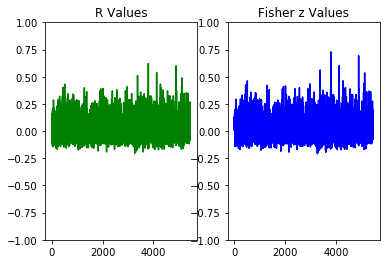

In [ ]:
reload(es)
ophys_experiment_id = 545578997
stimulus = 'natural_scenes'
cliques, CE_final, CE_sorted_by_size, CE_sorted_by_participation, percent_participation, ensembles, cellID, metadata = es.exp_to_ensembles(
    boc,ophys_experiment_id, stimulus,verbose=True)

In [46]:
CE_sorted_by_participation, CE_sorted_by_size, clique_summary, core_summary, percent_participation = ecf.summary_stats(
    ensembles,cliques,CE_final,verbose=False)

In [72]:
non_zero_CE = []
for i,particpation in enumerate(percent_participation):
    if particpation != 0.:
        non_zero_CE.append(CE_final[i])
# print len(non_zero_CE)

non_zero_CE
for CE in non_zero_CE:
    print len(CE)



12


In [65]:
cliques

[[0, 45],
 [2, 60],
 [2, 22],
 [3, 8],
 [3, 16],
 [3, 36],
 [3, 44],
 [4, 36],
 [4, 6],
 [5, 33],
 [5, 6],
 [6, 46],
 [8, 29],
 [9, 32],
 [9, 49],
 [9, 36],
 [9, 45],
 [12, 55],
 [13, 54],
 [14, 37],
 [17, 57],
 [18, 60],
 [21, 23],
 [22, 54],
 [22, 23],
 [24, 32],
 [24, 58],
 [27, 56],
 [27, 28],
 [28, 55],
 [29, 31],
 [39, 49],
 [40, 34, 56],
 [40, 34, 35],
 [40, 37],
 [40, 15],
 [43, 49, 47],
 [44, 34],
 [46, 55],
 [48, 53],
 [52, 53]]

In [33]:
cellID


array([  5.83827968e+08,   5.83829507e+08,   5.83829793e+08,
         5.83829002e+08,   5.83831054e+08,   5.83832593e+08,
         5.83828494e+08,   5.83829016e+08,   5.83832580e+08,
         5.83829530e+08,   5.83831068e+08,   5.83832606e+08,
         5.83829254e+08,   5.83831592e+08,   5.83829037e+08,
         5.83831094e+08,   5.83828023e+08,   5.83828051e+08,
         5.87950858e+08,   5.83829054e+08,   5.83828038e+08,
         5.83832649e+08,   5.83829069e+08,   5.83832144e+08,
         5.87950675e+08,   5.83830613e+08,   5.83832664e+08,
         5.83827545e+08,   5.83828060e+08,   5.83827038e+08,
         5.83831137e+08,   5.83830628e+08,   5.83832165e+08,
         5.83827051e+08,   5.83831150e+08,   5.83832176e+08,
         5.83832690e+08,   5.83830643e+08,   5.83828086e+08,
         5.83828756e+08,   5.83832188e+08,   5.83827585e+08,
         5.83827592e+08,   5.87951245e+08,   5.83827087e+08,
         5.83827606e+08,   5.83828420e+08,   5.83831194e+08,
         5.83827104e+08,

In [ ]:
# def exp_to_ensembles(boc,ophys_experiment_id, stimulus, verbose=False):
#     start_time = t.time()
#     if verbose:
#         dataset = boc.get_ophys_experiment_data(ophys_experiment_id=ophys_experiment_id)
#         print str(dataset.number_of_cells) + ' Neurons in Experiment'
#         plt.imshow(dataset.get_max_projection())
#         plt.show()
    
#     spikes, timestamps, spike_times, isis = dt.get_epoch_spiking_data(boc, ophys_experiment_id,num_std=5)
    
#     if verbose:
#         print('Spikes determined – ' + str(t.time()-start_time) +' elapsed')
#         dt.plot_raster(spike_times[stimulus], title=str(ophys_experiment_id) + '_' +stimulus)
    
#     info = []
#     info.append(timestamps)
#     info.append(spike_times)
    
#     time, spktms, cellID = de.get_ensemble_info(info, stimulus)
    
#     T = np.array([time[0],time[-1]])

    
#     time, ensembles = de.find_high_activity(spktms, T, dt=0.005, binsize=0.5, nsurr=1000, pval=0.05) 
    
#     if verbose:
#         print('high frequency frames determined – ' + str(t.time()-start_time) +' elapsed')
#         print 'Number of high frequency frames: ' + str(len(ensembles[1]))

#         plt.imshow(ensembles)

#     ensemble_matrix, above_thresh_ensembles_boot, z_values_boot = ecf.correlations_between_ensembles(
#         ensemble_array=ensembles,surr_num=100,percentile=95,verbose=verbose)
    
#     if verbose:
#         print('Ensemble matrix determined – ' + str(t.time()-start_time) +' elapsed')
    
#     cliques = ecf.get_correlation_cliques(ensembles,above_thresh_ensembles_boot,verbose=verbose)
    
#     CE_final = ecf.get_unique_core_ensembles(ensembles,cliques,95)
   
    

#     if verbose:
#         ecf.summary_stats(ensembles,cliques,CE_final,verbose=verbose)
#         print('Core Ensembles determined – ' + str(t.time()-start_time) +' elapsed')
    
    
#     return CE_final


In [ ]:
reload(ecf)

In [ ]:
ce_final.shape

In [ ]:
#Get BrainObservatoryCache
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
manifest_file = os.path.join(drive_path,'brain_observatory_manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

173

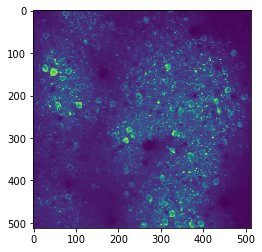

In [11]:
#Select Ophys experiment
ophys_experiment_id = 574685634 #example experiment
dataset = boc.get_ophys_experiment_data(ophys_experiment_id)
plt.imshow(dataset.get_max_projection())
dataset.number_of_cells

In [ ]:
#Get spiking data for each stimulus epoch in ophys_experiment_id


In [ ]:
reload(de)

T = np.array([time[0],time[-1]])

#using defaults here.  Adjust inputs for your desired data set. 
time, ensembles = de.find_high_activity(spktms, T, dt=0.005, binsize=0.5, nsurr=1000, pval=0.05) 

In [ ]:
num_ensembles_ns = ensembles.shape[1]
print num_ensembles_ns
plt.imshow(ensembles)
plt.show()